<a href="https://colab.research.google.com/github/AilingLiu/Growth_Analysis/blob/master/Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action="ignore")

# Monthly Unique Customer

"Monthly unique visitors is a count of the number of unique individuals who visited your website in a given month. If someone visits your site multiple times, he/she will only be counted as one unique visitor (assuming the same device and browser is used for each visit and the visitor doesn’t clear his/her cookies between visits). "

In [45]:
url='https://github.com/AilingLiu/Growth_Analysis/blob/master/data.csv?raw=true'
retail = pd.read_csv(url, encoding = 'unicode_escape')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [46]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [47]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


This dataset consists of 8 columns. None of the columns has missing data. `Quantity` and `UnitPrice` columns have negative values, indicating either misktake or charge back of the order. 

In [49]:
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'])
retail['InvoiceYM']=retail['InvoiceDate'].apply(lambda x: x.strftime('%Y%m'))
retail[['InvoiceDate', 'InvoiceYM']].head(3)

,InvoiceDate,InvoiceYM
0,2010-12-01 08:26:00,201012
1,2010-12-01 08:26:00,201012
2,2010-12-01 08:26:00,201012


In [54]:
minyearmonth = retail.groupby(['CustomerID'])['InvoiceDate'].min().apply(lambda x: x.strftime('%Y%m')).to_frame('MinYearMonth')
retail=retail.join(minyearmonth, on='CustomerID')
retail['CustomerType'] = np.where(retail['InvoiceYM'] == retail['MinYearMonth'], 'New', 'Exist')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYM,MinYearMonth,CustomerType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,201012,New


In [74]:
MUC= retail.groupby(['InvoiceYM', 'CustomerType'])['CustomerID'].nunique().to_frame('MonthlyUniqueCustomer').unstack()
MUC.columns = MUC.columns.droplevel(0)
MUC['Total'] = MUC.sum(axis=1)
MUC

CustomerType,Exist,New,Total
InvoiceYM,,,
201012,0,948,948
201101,362,421,783
201102,418,380,798
201103,580,440,1020
201104,600,299,899
201105,800,279,1079
201106,816,235,1051
201107,802,191,993
201108,813,167,980


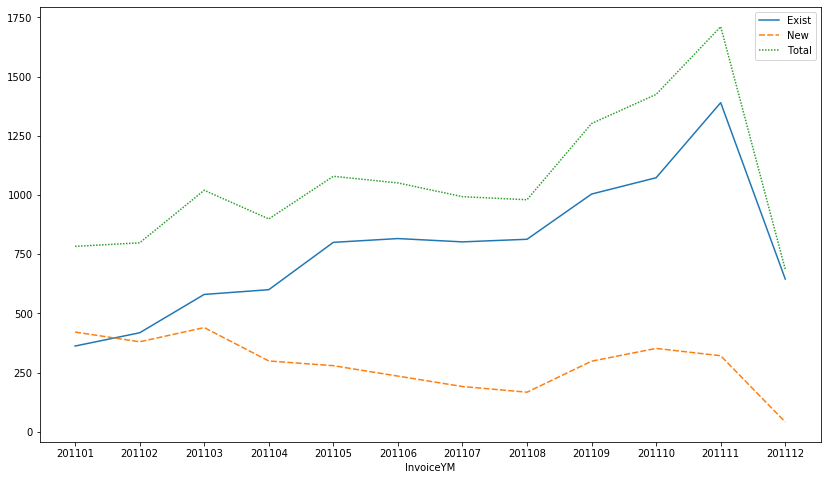

In [76]:
fig=plt.figure(figsize=(14, 8))
sns.lineplot(data=MUC.loc['201101':'201112'])#exluding first and last rows